In [1]:
get_ipython().system('pip install --user scikit-network==0.26.0')
get_ipython().system('pip install --upgrade scikit-network')
from sknetwork.ranking import PageRank
import numpy as np
import pandas as pd

  Using cached scikit_network-0.26.0-py3-none-any.whl
  Obtaining dependency information for scikit-network from https://files.pythonhosted.org/packages/71/c7/c16e7dc6c22548cb38e143e54f20fd3b10f26d5cb89fa8cacc4041e12ad2/scikit_network-0.31.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_network-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
Using cached scikit_network-0.31.0-cp311-cp311-win_amd64.whl (2.0 MB)
  Attempting uninstall: scikit-network
    Found existing installation: scikit-network 0.26.0
    Uninstalling scikit-network-0.26.0:
      Successfully uninstalled scikit-network-0.26.0


In [2]:
get_ipython().system('pip install --upgrade --no-cache-dir gdown')

In [3]:
get_ipython().system('gdown --id 1Xu8EeWQZFkPe-1EvqMpkkMMg09Mgy07_')

C:\Users\dahal\anaconda3\Lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Xu8EeWQZFkPe-1EvqMpkkMMg09Mgy07_
To: C:\Users\dahal\Comedy_IMDB.csv

  0%|          | 0.00/1.77M [00:00<?, ?B/s]
 30%|##9       | 524k/1.77M [00:00<00:00, 2.56MB/s]
100%|##########| 1.77M/1.77M [00:00<00:00, 6.60MB/s]
100%|##########| 1.77M/1.77M [00:00<00:00, 5.79MB/s]


In [4]:
IMDB_movies_graph = pd.read_csv('Comedy_IMDB.csv')

dataset_field = list(IMDB_movies_graph.columns)
nice_print = pd.DataFrame( dataset_field )
nice_print.rename(columns = {0: 'IMDB Movie dataset Field names'}, inplace = True)
print(nice_print)
print()

print("The number of row of the dataset are: ", IMDB_movies_graph.shape[0])
print()
IMDB_movies_graph = IMDB_movies_graph.head(100)
print(f"First row:\n{IMDB_movies_graph.iloc[0]}")
print()
print(f"Last row:\n{IMDB_movies_graph.iloc[-1]}")

  IMDB Movie dataset Field names
0                             SN
1                          Movie
2                          Genre
3                        Runtime
4                    Certificate
5                         Rating
6                           Cast
7                    Description
8                          Votes
9                       Director

The number of row of the dataset are:  5294

First row:
SN                                                             1
Movie                                         They Cloned Tyrone
Genre                        Action, Comedy, Mystery            
Runtime                                                  122 min
Certificate                                                    R
Rating                                                       6.7
Cast           ['John Boyega, ', 'Jamie Foxx, ', 'Teyonah Par...
Description    A series of eerie events thrusts an unlikely t...
Votes                                                     14

In [5]:
print(IMDB_movies_graph.columns)

Index(['SN', 'Movie', 'Genre', 'Runtime', 'Certificate', 'Rating', 'Cast',
       'Description', 'Votes', 'Director'],
      dtype='object')


In [6]:
nice_print

,IMDB Movie dataset Field names
0,SN
1,Movie
2,Genre
3,Runtime
4,Certificate
5,Rating
6,Cast
7,Description
8,Votes
9,Director


In [7]:
import copy
ddf = copy.deepcopy(IMDB_movies_graph)
ddf = ddf.apply(lambda x: x.replace(',', '').replace(' ', '') if x.dtype == 'O' else x)

# ddf['Genre'] = ddf['Genre'].str.split(', ')
# ddf = ddf.explode('Genre')
ddf['Cast'] = ddf['Cast'].apply(lambda x: [name.strip(', ') for name in eval(x)])
ddf = ddf.explode('Cast')
ddf['Director'] = ddf['Director'].apply(lambda x: " ".join([director for director in eval(x) if x != ""]).strip(", "))
ddf['Person'] = ddf.apply(lambda row: [row['Director'], row['Cast']], axis=1)
ddf = ddf.explode('Person')

index_name = 'Genre'
dtype_of_index = ddf[index_name].dtype
# Display the updated DataFrame
ddf,dtype_of_index

(     SN               Movie                                Genre  Runtime  \
 0     1  They Cloned Tyrone  Action, Comedy, Mystery              122 min   
 0     1  They Cloned Tyrone  Action, Comedy, Mystery              122 min   
 0     1  They Cloned Tyrone  Action, Comedy, Mystery              122 min   
 0     1  They Cloned Tyrone  Action, Comedy, Mystery              122 min   
 0     1  They Cloned Tyrone  Action, Comedy, Mystery              122 min   
 ..  ...                 ...                                  ...      ...   
 99  100  The Last Boy Scout    Action, Comedy, Crime              105 min   
 99  100  The Last Boy Scout    Action, Comedy, Crime              105 min   
 99  100  The Last Boy Scout    Action, Comedy, Crime              105 min   
 99  100  The Last Boy Scout    Action, Comedy, Crime              105 min   
 99  100  The Last Boy Scout    Action, Comedy, Crime              105 min   
 
    Certificate  Rating             Cast  \
 0            R   

In [8]:
# unique_genres = ddf['Genre'].explode().unique()
unique_movies = ddf['Movie'].unique()
unique_director = ddf['Director'].unique()
unique_rating = ddf['Rating'].unique()

print(f'Unique Movies: {len(unique_movies)}')
print(f'Unique Director: {len(unique_director)}')
print(f'Unique Rating: {len(unique_rating)}')

Unique Movies: 99
Unique Director: 100
Unique Rating: 36


In [9]:
import pandas as pd
import networkx as nx
import copy
df = copy.deepcopy(ddf)

# Create a bipartite graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    G.add_node(row['Movie'], bipartite=0)  # Movie nodes
    G.add_node(row['Person'], bipartite=1)  # Director and cast nodes
    G.add_node(row['Rating'], bipartite=1)  # Rating nodes
    G.add_node(row['Genre'], bipartite=1)   # Genre nodes

    G.add_edge(row['Movie'], row['Person'])
    G.add_edge(row['Movie'], row['Rating'])
    G.add_edge(row['Movie'], row['Genre'])

# Add ratings to the graph
rating_data = {
    'Movie': [],
    'Rating': []
}
for _, row in df.iterrows():
    rating_data['Movie'].append(row['Movie'])
    rating_data['Rating'].append(row['Rating'])
    G.nodes[row['Rating']]['bipartite'] = 1  # Set the bipartite attribute for rating nodes

# Display ratings
print("Movie Ratings:")
rating_df = pd.DataFrame(rating_data)
rating_df = rating_df.sort_values(by='Rating', ascending=False)
display(rating_df)

# Calculate PageRank scores with the updated graph
pagerank_scores = nx.pagerank(G)

# Display PageRank scores
print("\nPageRank Scores for Movies:")
score_data = {
    'Movie': [],
    'Score': []
}
for node, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
    if G.nodes[node]['bipartite'] == 0:  # Check if the node is a movie
        score_data['Movie'].append(node)
        score_data['Score'].append(score)

score_df = pd.DataFrame(score_data)
score_df = score_df.sort_values(by='Score', ascending=False)
display(score_df)



Movie Ratings:


,Movie,Rating
589,One Punch Man: Wanpanman,8.7
11,The Boys,8.7
19,The Boys,8.7
18,The Boys,8.7
17,The Boys,8.7
...,...,...
573,Peter Pan & Wendy,4.4
572,Peter Pan & Wendy,4.4
571,Peter Pan & Wendy,4.4
570,Peter Pan & Wendy,4.4



PageRank Scores for Movies:


,Movie,Score
0,Teenage Mutant Ninja Turtles,0.008882
1,Archer,0.005509
2,Pixels,0.005427
3,Ready or Not,0.005316
4,Barry,0.005283
...,...,...
94,Deadpool 2,0.004306
95,Ant-Man,0.004262
96,Game Night,0.004242
97,Guardians of the Galaxy Vol. 2,0.004078


In [11]:
import pandas as pd
from scipy import stats

merged_df = pd.merge(score_df, rating_df, on='Movie')

# Setup sample weights
weights = [
    {'score': 0.1, 'rating': 0.9},   
    {'score': 0.5, 'rating': 0.5},
    {'score': 0.7, 'rating': 0.3},   
    {'score': 0.9, 'rating': 0.1}
]

# Function to calculate combined score
def calculate_score(subset_df, w):
    subset_df['norm_score'] = (subset_df['Score'] - min(subset_df['Score'])) / (max(subset_df['Score']) - min(subset_df['Score'])) 
    subset_df['norm_rating'] = (subset_df['Rating'] - min(subset_df['Rating'])) / (max(subset_df['Rating']) - min(subset_df['Rating']))
    
    subset_df['combined'] = (w['score'] * subset_df['norm_score']) + (w['rating'] * subset_df['norm_rating']) 
    
    return subset_df

# Calculate combined score for each weighting  
combined_dfs = []
for w in weights:
    temp_df = calculate_score(merged_df.copy(), w)
    combined_dfs.append(temp_df)

# Statistical correlation analysis
print("Correlation Analysis:")
for i in range(len(combined_dfs)): 
    print(f"Weight #{i+1} Correlation: {stats.pearsonr(combined_dfs[i]['norm_score'], combined_dfs[i]['combined'])}")
    
# Top 10 overlap analysis  
print("Overlap Analysis:")
for i in range(len(combined_dfs)):
  print(f"Weight #{i+1} Overlap: {len(set(combined_dfs[0].head(10)['Movie']).intersection(set(combined_dfs[i].head(10)['Movie'])))}")

Correlation Analysis:
Weight #1 Correlation: PearsonRResult(statistic=-0.055290954989041984, pvalue=0.08053268415686685)
Weight #2 Correlation: PearsonRResult(statistic=0.4500615112520616, pvalue=4.964446732264861e-51)
Weight #3 Correlation: PearsonRResult(statistic=0.8020815493785326, pvalue=1.1909886755115685e-225)
Weight #4 Correlation: PearsonRResult(statistic=0.984086827599173, pvalue=0.0)
Overlap Analysis:
Weight #1 Overlap: 1
Weight #2 Overlap: 1
Weight #3 Overlap: 1
Weight #4 Overlap: 1



Saved correlation plot at correlation_plot.png


Saved overlap plot at overlap_plot.png


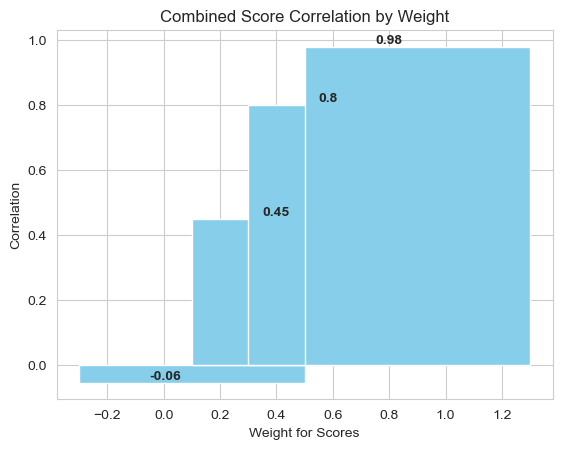

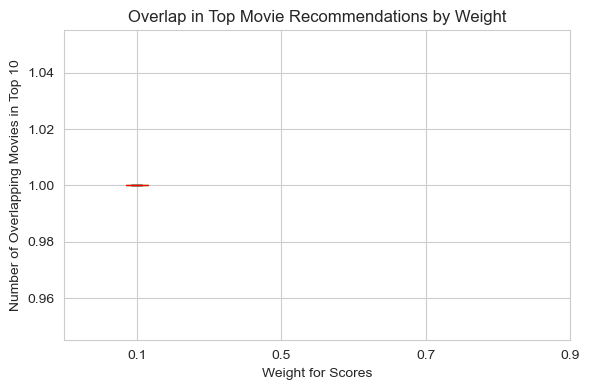

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample correlation data
correlations = [-0.055, 0.45, 0.80, 0.98] 
weights = [0.1, 0.5, 0.7, 0.9]

# Create bar chart
fig, ax = plt.subplots()
ax.bar(weights, correlations, color='skyblue')  # Added color to the bars

ax.set_xlabel("Weight for Scores")
ax.set_ylabel("Correlation")
ax.set_title("Combined Score Correlation by Weight")

# Annotate bars with values
for i, v in enumerate(correlations): 
    ax.text(weights[i] - 0.15, v + 0.01, str(round(v, 2)), fontweight='bold')

plt.savefig("correlation_plot.png")
print("\nSaved correlation plot at correlation_plot.png\n")

# Boxplot for overlap
fig, ax = plt.subplots(figsize=(6, 4))  # Set figure size
ax.boxplot([1, 1, 1, 1], boxprops=dict(color='lightgreen'), whiskerprops=dict(color='purple'), medianprops=dict(color='red'))  # Customize boxplot colors

# Set x-axis ticks and labels
ax.set_xticks(range(1, len(weights) + 1))
ax.set_xticklabels(weights)
ax.set_xlabel("Weight for Scores")  # Added x-axis label
ax.set_ylabel("Number of Overlapping Movies in Top 10")
ax.set_title("Overlap in Top Movie Recommendations by Weight", fontsize=12)  # Modified title font size

plt.tight_layout()
plt.savefig("overlap_plot.png")
print("\nSaved overlap plot at overlap_plot.png")


In [12]:
merged_df = pd.merge(score_df, rating_df, on='Movie')

# Normalize the scores to a range between 0 and 1
merged_df['Normalized_Score'] = (merged_df['Score'] - merged_df['Score'].min()) / (merged_df['Score'].max() - merged_df['Score'].min())
merged_df['Normalized_Rating'] = (merged_df['Rating'] - merged_df['Rating'].min()) / (merged_df['Rating'].max() - merged_df['Rating'].min())

# Define weights for the normalized scores
weight_score = 0.7
weight_rating = 0.3

# Calculate the combined score using the weighted sum
merged_df['Combined_Score'] = (weight_score * merged_df['Normalized_Score']) + (weight_rating * merged_df['Normalized_Rating'])

# Order the DataFrame by the combined score in descending order
merged_df = merged_df.sort_values(by='Combined_Score', ascending=False)

unique_merged_df = merged_df.drop_duplicates(subset='Movie', keep='first')
# Display the recommended movies
print("\nRecommended Movies:")
display(unique_merged_df[['Movie', 'Combined_Score']])



Recommended Movies:


,Movie,Combined_Score
0,Teenage Mutant Ninja Turtles,0.860465
25,Archer,0.508785
57,Barry,0.462410
79,Cobra Kai,0.452517
149,The Boys,0.448990
...,...,...
920,Thor: Love and Thunder,0.174271
83,Superhero Movie,0.173035
551,Drive Angry,0.165189
735,Tank Girl,0.149170


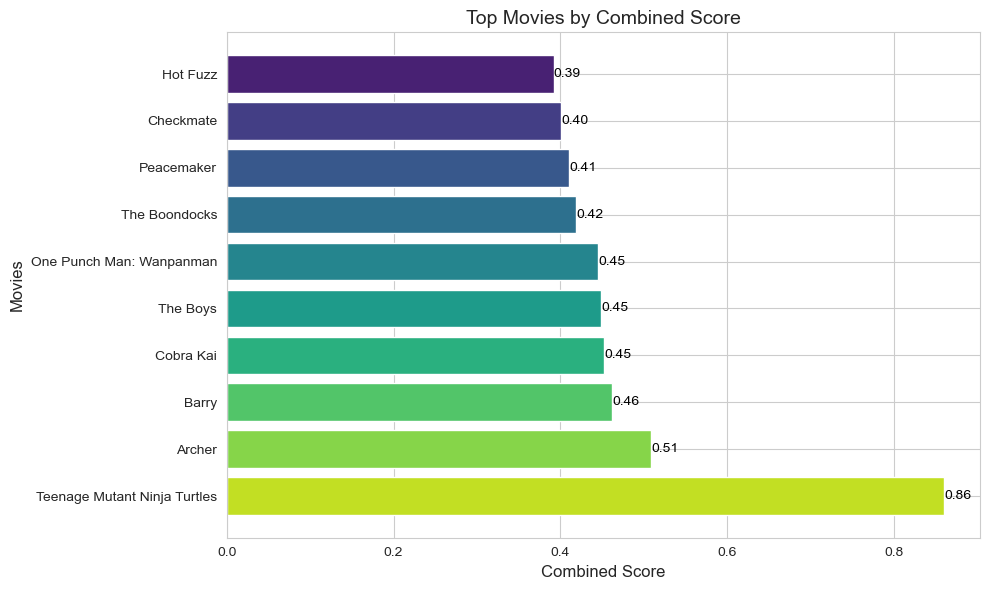

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style
sns.set_style('whitegrid')

# Assuming unique_merged_df contains the processed DataFrame
# Extracting top movies and combined scores
top_movies = unique_merged_df['Movie'].head(10)
combined_scores = unique_merged_df['Combined_Score'].head(10)

# Create a color palette
colors = sns.color_palette('viridis', len(top_movies))

# Create a bar chart for top movies and their combined scores
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_movies[::-1], combined_scores[::-1], color=colors)

# Add labels and title
ax.set_xlabel('Combined Score', fontsize=12)
ax.set_ylabel('Movies', fontsize=12)
ax.set_title('Top Movies by Combined Score', fontsize=14)

# Add values on each bar
for bar, score in zip(bars, combined_scores[::-1]):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
            va='center', ha='left', color='black')

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()